<a href="https://colab.research.google.com/github/caio-azevedo/compras/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PPGE/UFPB
### Ciência de Dados com Python
------
**Professores:** Aléssio Almeida, Hilton Martins

**Semestre Letivo**: 2019.2

**Alunos**: Caio Azevedo, Guilherme Carvalho, Renata Figueiredo.

---
# Análise de *Clusters*
---
## 1. Introdução

### O que é?
Em linhas gerais, a Análise de *Clusters* (Aglomerado) consiste em uma técnica de procedimentos exploratórios que busca descobrir agrupamentos naturais de indivíduos (ou variáveis) a partir dos dados observados, agrupando-os com base na similaridade ou distâncias (dissimilaridades). Sendo uma técnica de aprendizagem descritiva e não supervisionada

### Quando usar?
Quando a preocupação principal é dividir os elementos em grupos, de forma que os elementos de um mesmo grupo sejam homogêneos e os elementos em grupos diferentes sejam heterogêneos.


### Por que agrupar elementos?
Agrupamentos podem fornecer um significado informal para avaliar a dimensionalidade, além de identificar *outliers* e sugerir hipóteses acerca da estrutura de relações dos dados.

Portanto, sua aplicação consiste na:
* classificação de elementos;
* simplificação dos dados;
* identificação das relações entre os elementos.

### Exemplos de aplicações
* **Psicologia:** onde é utilizada na classificação de pessoas de acordo com seus perfis de personalidade; 
* **Pesquisa de mercado:** na identificação do posicionamento de produtos em relação aos concorrentes de mercado e na segmentação de clientes de acordo com perfis de consumo;  
* **Estudos regionais:** na classificação de cidades, estados de acordo com variáveis físicas, demográficas e econômicas etc.
---

## 2. Medidas de dissimilaridades e similaridades

### Como agrupar os elementos?

Os elementos são agrupados conforme suas similaridades (semelhanças) ou dissimilaridades (diferenças). Para definir a semelhança (ou diferença) entre os elementos, é usada uma função de distância.


Duas técnicas são geralmente utilizadas para obter as distâncias entre elementos, conforme o tipo de variável:

* Medidas de Dissimilaridades => **variáveis quantitativas**;
* Coeficientes de similaridade => **variáveis qualitativas**;



### I. Medidas de Dissimilaridade (Distância)

Suponha que se tenha disponível um conjunto de dados constituído de *n* elementos amostrais, tendo-se medido *p* variáveis aleatórias em cada um deles. O objetivo é agrupar esses elementos em *g* grupos. Para cada elemento amostral *j*, tem-se, portanto, o vetor de medidas $X_j$, definido por:

$$X'_j=[X_{j1}, X_{j2}, ... , X_{jp}], \quad j=1,2,...,n$$


Assim, utiliza-se uma das medidas de dissimilaridades ou distância, que quanto menor o seu valor, mais similares são os elementos comparados.

Algumas medidas comuns, apropriadas para variáveis quantitativas, são apresentadas a seguir:

i. Distância Euclidiana;

ii. Distância de Mahalanobis;

iii. Distância de Minkowsky.

Para maior detalhamento sobre tais distâncias consultar *Applied Multivariate Statistical Analysis* – Johnson, R. & Wichern, D.

### Exemplo:
Considere o exemplo abaixo para o cálculo da distância euclidiana através do Python.

Ex.1: Os dados da tabela a seguir representam a renda mensal (em quantidade de salários mínimos) e a idade de seis indivíduos de uma localidade.


Indivíduo | Renda | Idade
--- | --- | ---
A | 9.6 | 28
B | 8.4 | 31
C | 2.4 | 42
D | 18.2 | 38
E | 3.9 | 25
F | 6.4 | 41









In [ ]:
import numpy as np
from scipy import spatial

# Criando a matriz do exemplo 1
X = np.array([[9.6, 28],
             [8.4, 31],
             [2.4, 42],
             [18.2, 38],
             [3.9, 25],
             [6.4, 41]])

# Criando uma lista com os nomes dos indivíduos
individuos = ['A', 'B', 'C', 'D', 'E', 'F']

# Calculando as distâncias euclidianas entre as observações no espaço n-dimensional

dist = spatial.distance.pdist(X, metric='euclidean')


#Convertando o vetor de distância de forma vetorial em uma matriz de distância de forma quadrada.

matriz_dist = spatial.distance.squareform(dist).round(2)

matriz_dist


array([[ 0.  ,  3.23, 15.74, 13.19,  6.44, 13.39],
       [ 3.23,  0.  , 12.53, 12.04,  7.5 , 10.2 ],
       [15.74, 12.53,  0.  , 16.3 , 17.07,  4.12],
       [13.19, 12.04, 16.3 ,  0.  , 19.33, 12.18],
       [ 6.44,  7.5 , 17.07, 19.33,  0.  , 16.19],
       [13.39, 10.2 ,  4.12, 12.18, 16.19,  0.  ]])

As distâncias entre os elementos são armazenadas em uma matriz de distâncias:

$$
D_{n,n} =
 \begin{pmatrix}
  0 & d_{1,2} & \cdots & d_{1,n} \\
   & 0 & \cdots & d_{2,n} \\
    &  & \ddots & \vdots  \\
   &  &  & 0
 \end{pmatrix}
 $$
 
 em que $d_{lk}$ representa a distância do elemento *l* ao elemento *k*.

 ### II. Coeficientes de similaridades

Em muitas situações, a pesquisa envolve a análise de variáveis qualitativas. Nestes casos, há duas formas de tratamento: 
* ou transformam-se estas variáveis para quantitativas e usam-se as
medidas de dissimilaridades descritas anteriormente;
* ou então trabalha-se com coeficientes de similaridades, especialmente desenvolvidos para variáveis qualitativas.

Em geral, comparam-se os elemnetos de acordo com a presença ou ausência de certas características. A presença ou ausência de uma característica num elemento pode ser representada por uma variável binária do tipo 0 ou 1.

Alguns coeficientes de similaridade mais comuns para esse tipo de situação são:

* coeficiente de concordância simples;
* coeficiente de concordância positiva;
* coeficiante de *Jaccard*.

Para maior detalhamento sobre estes coeficiente e outros, consultar *Applied Multivariate Statistical Analysis* – Johnson, R. & Wichern, D.

### Exemplo:
Considere o exemplo abaixo para o cálculo do coeficiente de *Jaccard* através do Python.

Ex.2: Suponha três elementos com valores para 5 variáveis descritos na tabela abaixo. Genericamente, essas variáves estão associadas a quesitos classificatórios.

Variável | X1 | X2 | X3 | X4 | X5
--- | --- | --- | --- | --- | ---
Elemento 1 | 0 | 1 | 1 | 1 | 1
Elemento 2 | 0 | 0 | 1 | 1 | 1
Elemento 3 | 0 | 1 | 0 | 1 | 0




In [ ]:
# Criando Ex.2
Y = np.array([[0,1,1,1,1],
             [0,0,1,1,1],
             [0, 1, 0, 1, 0]])

elementos = ['I', 'II', 'III']

coef= spatial.distance.pdist(Y, metric='jaccard')

matriz_coef = spatial.distance.squareform(coef).round(2)

matriz_coef

array([[0.  , 0.25, 0.5 ],
       [0.25, 0.  , 0.75],
       [0.5 , 0.75, 0.  ]])

Da mesma forma que no caso das distâncias, é criada uma matriz de coeficientes de similaridades, onde estes são armazenados.

Existe ainda uma situação bastante comum que é quando se observa *p*-variáveis quantitativas e *q*-variáveis qualitativas.

Nessa situação se propõe atribuir valores às variáveis categóricas (*ad hoc*). Em seguida, usa-se uma medida de distância para comparar as *p+q* variáveis. Ou, uma proposta menos usual que é categorizar os valores das variáveis quantitativas e depois usar um coeficiente de similaridade para comparar as *p+q* variáveis.

---

# 3. Métodos para construção de *Clusters*

## Técnicas Hierárquicas
Identificam agrupamentos e o provável o número de grupos, por uma série de fusões (técnicas aglomerativas) ou uma série de sucessivas divisões (técnicas divisas).

Os resultados de ambos, aglomerativos e divisivos, são observados no **dendograma**, que ilustra as fusões ou divisões feitas em níveis sucessivos. 


### O passo a passo dos *Clusters* Hierárquicos

1.  Inicia com todos os elementos sendo o próprio cluster;
2. Usando a medida de similaridade, combina - através de algoritmos de agrupamento - 2 elementos mais semelhantes em um novo cluster, agora contendo 2 itens;
3. Repete o procedimento de agrupamento usando a medida de similaridade para combinar os dois itens mais semelhantes ou combinações de itens de outro cluster.
4. Continua o processo até que todos os itens estejam em um único cluster.



### Algoritmos de Agrupamento

Existem vários métodos de agrupamentos hierárquicos. A seguir, serão descritos os métodos mais comuns:

1. **Single Linkage**: estruturas geométricas diferentes, mas é incapaz de delinear grupos pouco separados;
2. **Average Linkage**: *clusters* de mesma variância interna, produzindo melhores partições;
3. **Complete Linkage**: *clusters* de mesmo diâmetro e isolam os *outliers* nos primeiros passos;
4. **Método de Ward**: *cluster* com o mesmo número de itens, baseado nos princípios de análise de variância.

Para maior detalhamento sobre cada um dos métodos consultar *Applied Multivariate Statistical Analysis* – Johnson, R. & Wichern, D.

### Continuação Ex.1

Continuando com os dados utilizado no Ex.1, segue abaixo a programação em Python utilizando Clusterização hierárquica, através do algoritmo de ligação de simples (*single linkage*):


<Figure size 432x288 with 0 Axes>

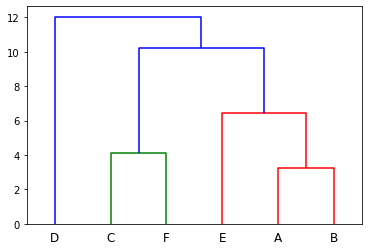

<Figure size 432x288 with 0 Axes>

In [ ]:
from scipy import cluster
import matplotlib.pyplot as plt

CA = cluster.hierarchy.linkage(X, method='single', metric='euclidean')
dend = cluster.hierarchy.dendrogram(CA, labels=individuos)
plt.figure()



A análise do Dendograma sugere uma partição em 4 grupos. Nesse sentido, em alguns casos pode ser importante para uma melhor visualização fazer a junção dos elementos da base de dados utilizada, com os respectivos *clusters* associados a eles.

Cabe observar que não existe um melhor “critério” de agregação hierárquica e a
melhor recomendação que se pode fazer é a utilização de vários métodos. Se todos
estes produzirem soluções interpretáveis similares, é possível concluir que a matriz dos dados apresenta agrupamentos “naturais”.

In [ ]:
import pandas as pd
CB = cluster.hierarchy.fclusterdata(X, t=4, criterion = 'maxclust', method='single', metric='euclidean')

df1 = pd.DataFrame(X, index=individuos, columns=['Renda','Idade'])
df2 = pd.DataFrame(CB, index=individuos, columns=['Cluster'])
df = pd.concat([df1, df2], axis=1)

df


,Renda,Idade,Cluster
A,9.6,28.0,2
B,8.4,31.0,2
C,2.4,42.0,1
D,18.2,38.0,4
E,3.9,25.0,3
F,6.4,41.0,1


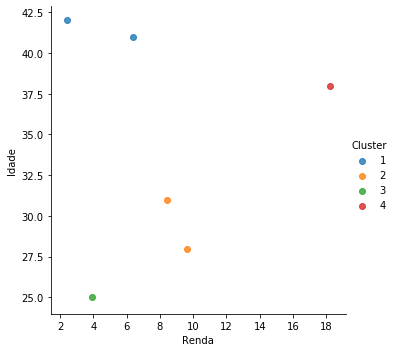

In [ ]:
import seaborn as sns
fig = sns.lmplot(x='Renda', y='Idade', data=df, hue='Cluster', fit_reg=False)
plt.show()

## Desvantagens

* Todas as técnicas seguem um algoritmo básico, porém com seus critérios (métricas). Na maioria delas as variações não são tratadas.
* Não aponta os itens agrupados incorretamente em um estágio anterior.

## Técnicas para a partição final

Uma questão importante é em que passo *k* o algoritmo deve ser interrompido obtendo-se um número *g* de clusters. Não existe resposta para esta pergunta, porém, podem-se aplicar alguns critérios.

* Análise do comportamento do nível de fusão;
* Análise do comportamento do nível de similaridade;
* Análise da soma de quadrados entre grupos ( Coeficiente $R^2$);
* Estatística Pseudo F (Calinski e Harabasz);



In [ ]:
from sklearn import metrics
metrics.calinski_harabasz_score(X, CB) 

19.36192095885973

## Técnicas não-hierárquicas (K-Means)

### Diferenças
* Definição prévia do número de *clusters*;
* Em cada estágio, novos *clusters* podem ser formados por divisão ou junção de *clusters* inicialmente definidos, sem dendogramas;
* Os algoritmos são iterativos e têm uma maior capacidade de análise do conjunto de dados.

### Passo-a-passo

Cada item é alocado para um *cluster* que tem um centroide mais próximo (média). Passos:
1. escolher k centroides (sementes) para iniciar o processo de partição;
2. comparar cada item com o centroide inicial por uma distância (por exemplo, Euclidiana). Os itens são alocados aos *clusters* pelo *min d(.)*;
3. após a alocação dos n itens, recalcular os centroides para cada novo *cluster* formado, repetindo o segundo passo com estes novos centroides;
4. repetir os passos 2 e 3 até que todos os elementos estejam bem alocados em seus grupos.





In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(X)

df_kmeans = pd.DataFrame(kmeans.labels_, index=individuos, columns=['cluster'])
df_kmeans = pd.concat([df1, df_kmeans], axis=1)
df_kmeans

,Renda,Idade,cluster
A,9.6,28.0,3
B,8.4,31.0,3
C,2.4,42.0,2
D,18.2,38.0,0
E,3.9,25.0,1
F,6.4,41.0,2


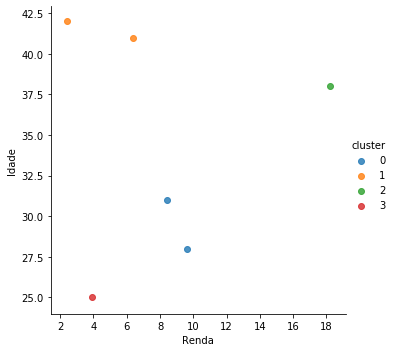

In [ ]:
fig = sns.lmplot(x='Renda', y='Idade', data=df_kmeans, hue='cluster', fit_reg=False)
plt.show()

In [ ]:
metrics.calinski_harabasz_score(X, kmeans.labels_) 

19.36192095885973

# Referências

* CHEN, Daniel Y. **Análise de dados com Python e Pandas**. São Paulo: Novatec, 2018.
* JOHNSON, R. A. & WICHERN, W. W. **Applied multivariate statistical analysis**. New Jersey:Prentice Hall, 2002.

